In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 6.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [22]:
df=pd.read_csv('adult_income.csv')

# 1 Data Cleaning 

## 1.1 Duplicates 

In [23]:
df[df.duplicated(keep='last')].sample(2)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
21103,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K
7053,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [24]:
df[df.duplicated(keep='first')].sample(2)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
28846,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### methods: keep the first record and drop the duplicates row

In [26]:
# 24 Duplicates

print('Before:' + str(df.shape))
df.drop_duplicates(keep='first',inplace=True)
print('After:' + str(df.shape))

Before:(32561, 15)
After:(32537, 15)


# 1.2 Missing Value

In [26]:
df.isna().sum()

Age                0
 Work-class        0
 fnlwgt            0
 Education         0
 Education-num     0
 Marital-status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Capital-gain      0
 Capital-loss      0
 Hours-per-week    0
 Native-country    0
 Income            0
dtype: int64

# 1.3 Non-standard Value

In [31]:
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    print(df[i].unique())

 Work-class
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 Marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 Occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 Relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 Race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 Sex
[' Male' ' Female']
 Native-country
[' United-States' ' Cuba' ' Jamaica' '

In [35]:
df[(df[' Work-class']==' ?')|(df[' Occupation']==' ?') |(df[' Native-country']==' ?')].shape[0]

2398

### methods：drop 2398 rows

In [36]:
df.drop(index=df[(df[' Work-class']==' ?')|(df[' Occupation']==' ?') |(df[' Native-country']==' ?')].index,inplace=True)

In [37]:
df.shape

(30139, 15)

## 1.4 Outlier

In [38]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,30139.00,30139.00,30139.00,30139.00,30139.00,30139.00
mean,38.44,189795.03,10.12,1092.84,88.44,40.93
std,13.13,105658.62,2.55,7409.11,404.45,11.98
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117627.50,9.00,0.00,0.00,40.00
50%,37.00,178417.00,10.00,0.00,0.00,40.00
75%,47.00,237604.50,13.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


Age


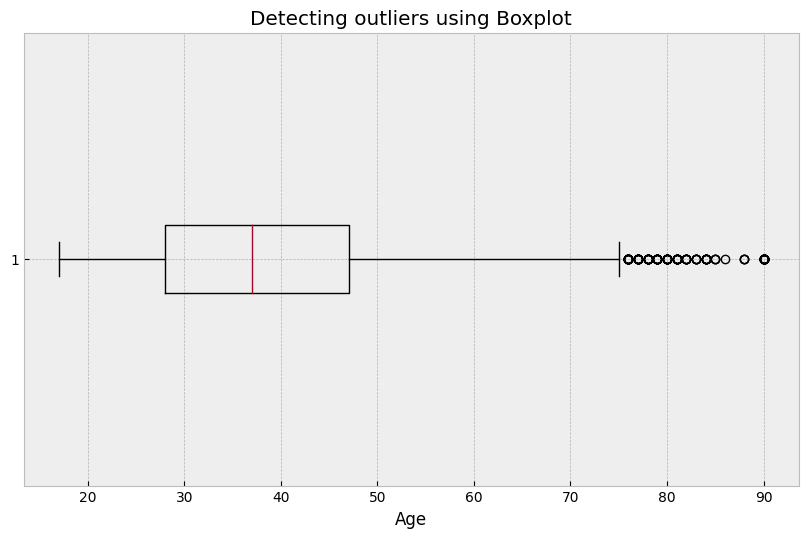

 fnlwgt


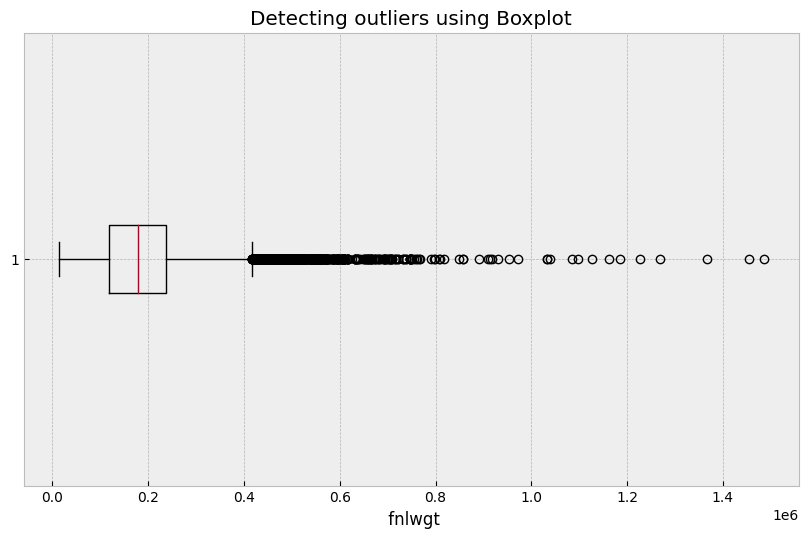

 Education-num


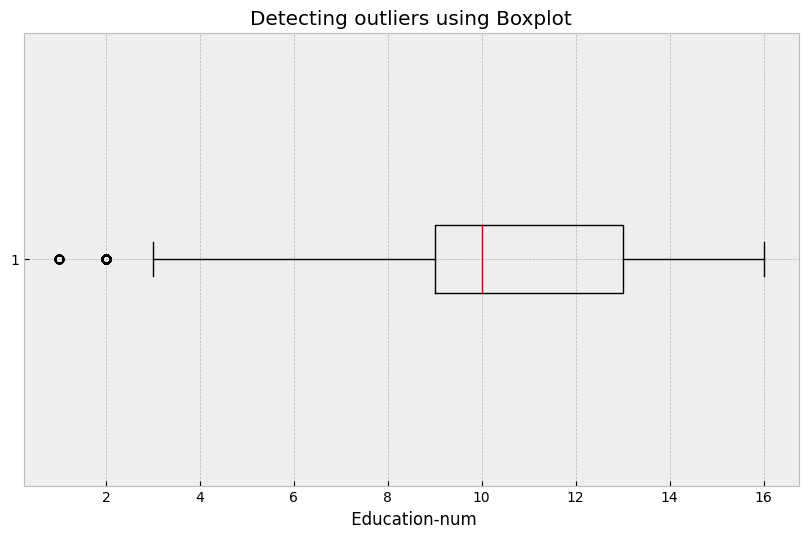

 Capital-gain


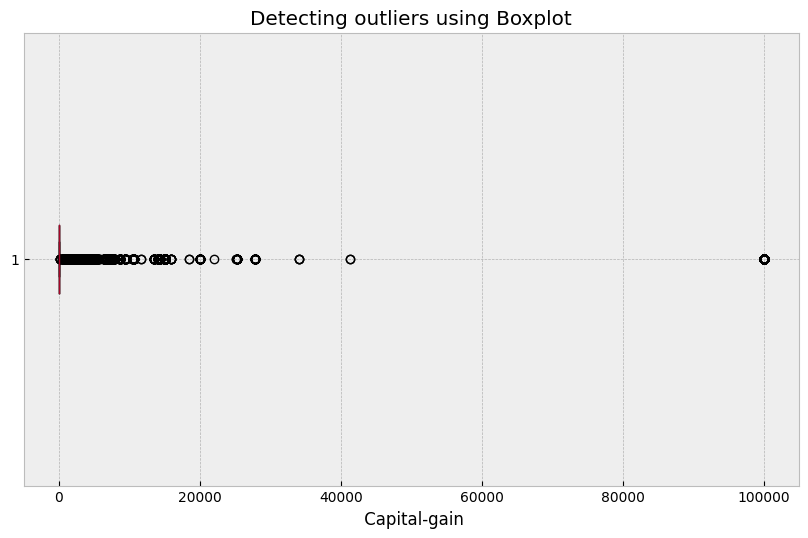

 Capital-loss


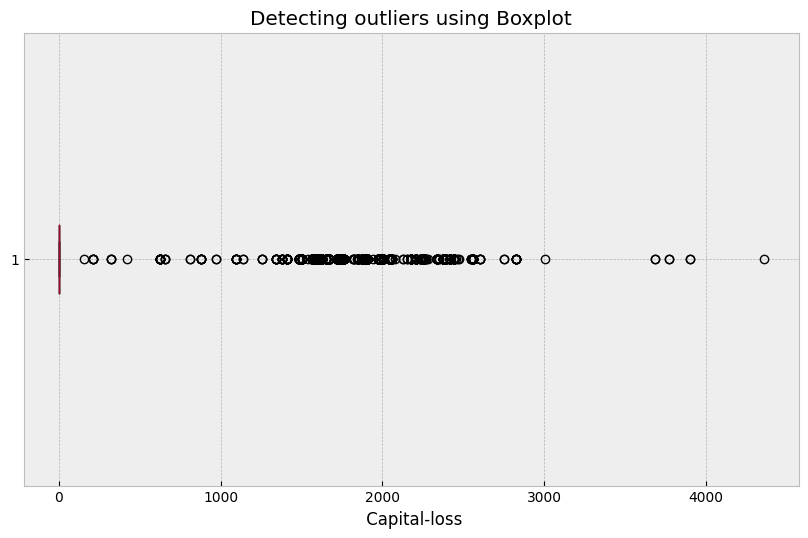

 Hours-per-week


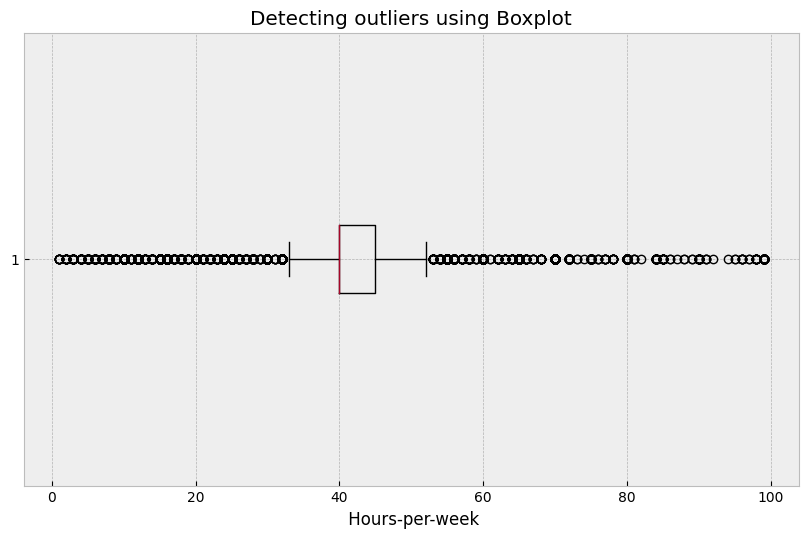

In [45]:
for i in df.select_dtypes(include=['int64']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    plt.boxplot(df[i], vert=False)
    plt.title("Detecting outliers using Boxplot")
    plt.xlabel(str(i))
    plt.show()

### methods: maybe to drop outliers? but I am not sure. I haven't drop yet~~

In [ ]:
def deleterows(df0,name,threshold):
    df=df0.copy()
    index=df[df[name]>=threshold].index
    drop=df.drop(index=index)
    return drop

In [ ]:
drop=deleterows(df,'order_total_num',20)
print(drop.shape)
drop=deleterows(drop,'order_amount',1000)
print(drop.shape)
drop=deleterows(drop,'order_total_payment',600)
print(drop.shape)
drop=deleterows(drop,'order_total_discount',85)
print(drop.shape)
drop=deleterows(drop,'order_count',4)
print(drop.shape)

# 2 Dependent Variable: Income

In [46]:
df['income']=df[' Income'].map(lambda x: 0 if x ==' <=50K' else 1)

/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


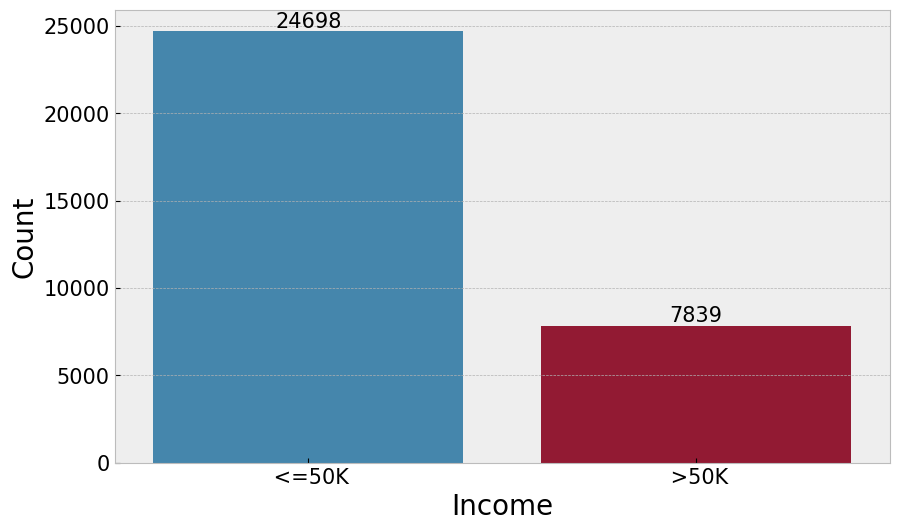

In [34]:
import seaborn as sns
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(df[' Income'])
for i,c in zip(range(2),df[' Income'].value_counts()):
    plt.text(i,c,c,ha='center', va='bottom',fontsize=15)

plt.xlabel('Income',size=20)
plt.ylabel('Count', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [51]:
df['income'].skew() 

1.160644133413007

# 3 Independent Variables

## 3.1 Numerical

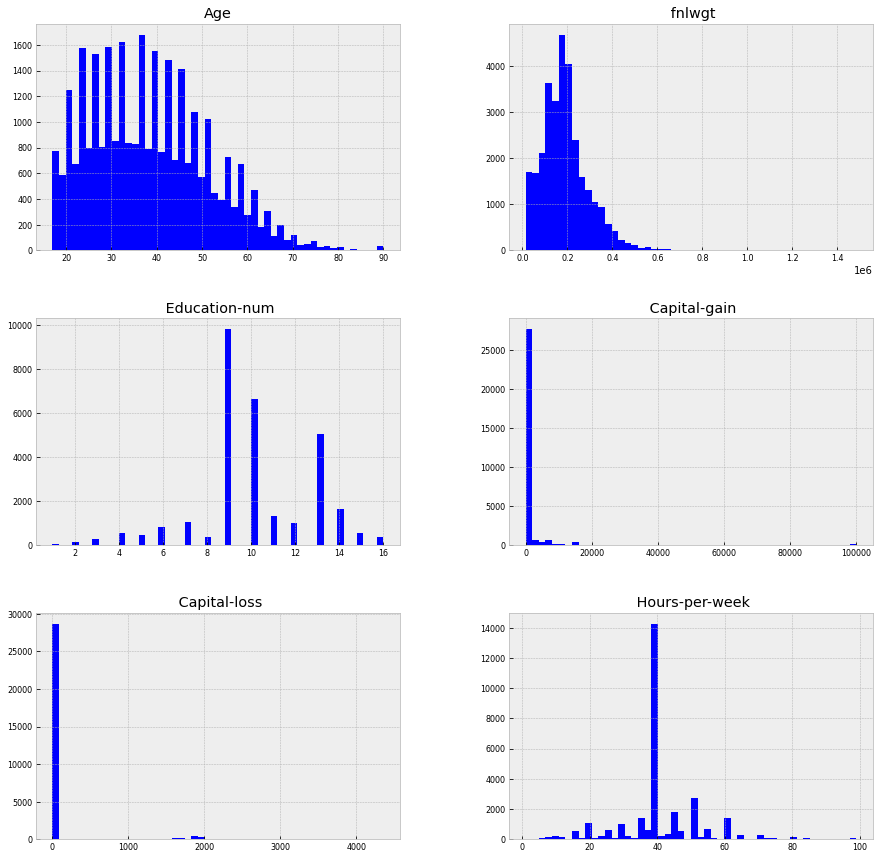

In [75]:
df.iloc[:,:-1].select_dtypes(include='int64').hist(figsize=(15, 15),color='blue', bins=50, xlabelsize=8, ylabelsize=8); 

## 3.2 Categorical

 Work-class


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


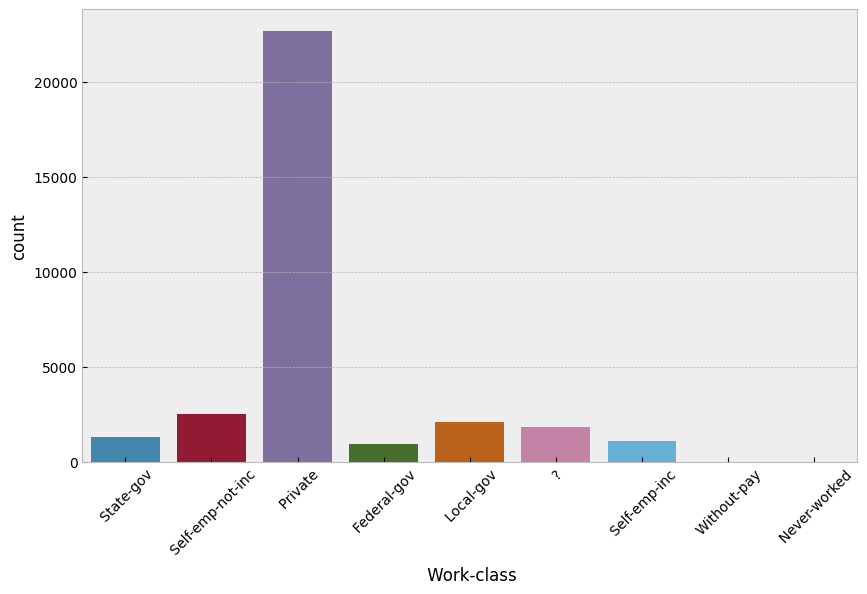

 Education


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


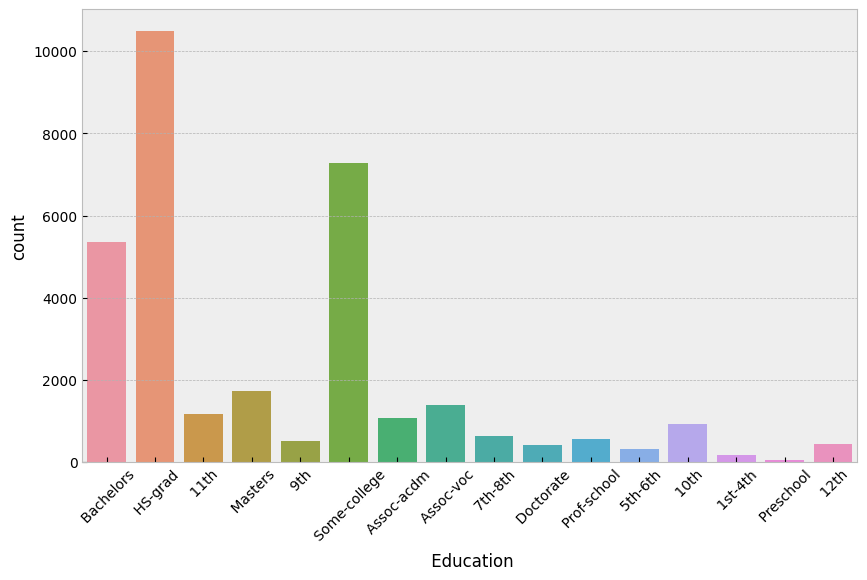

 Marital-status


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


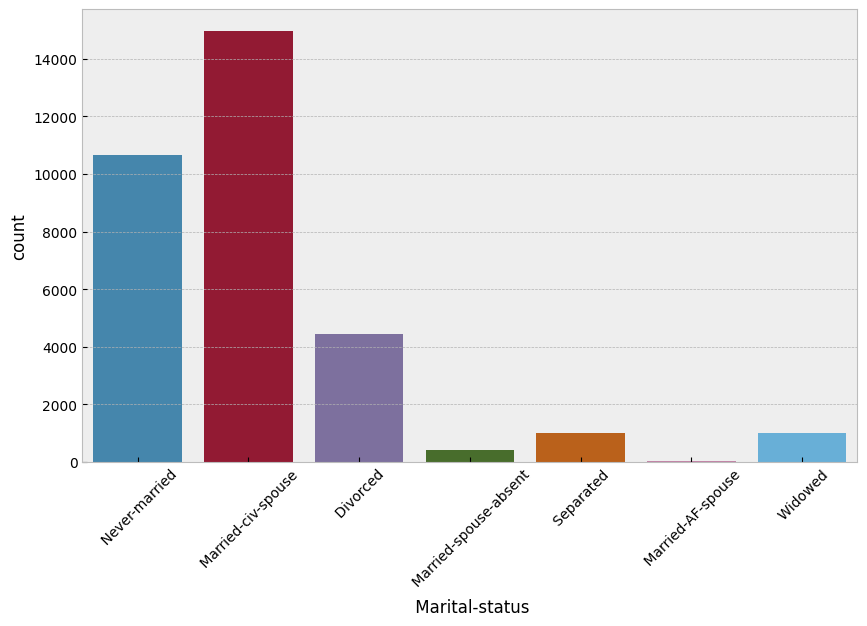

 Occupation


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


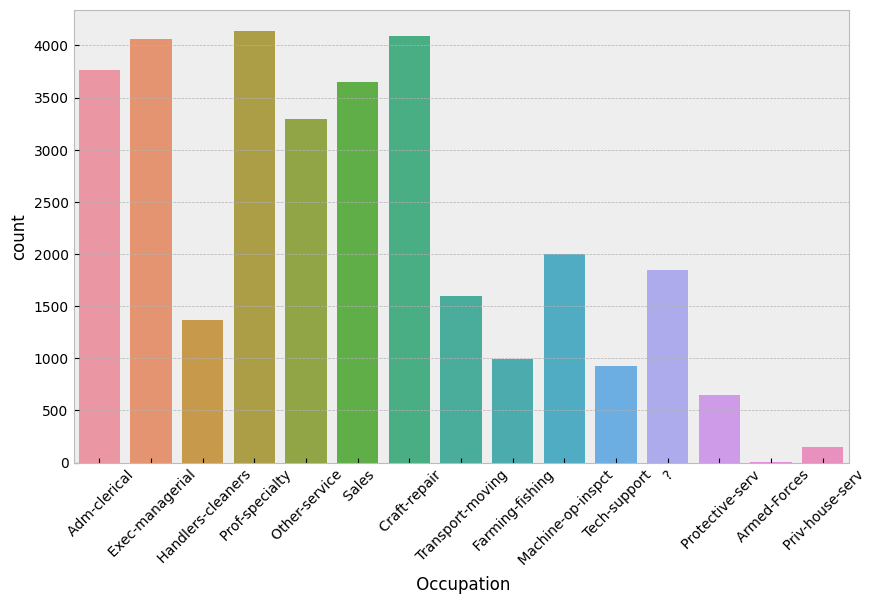

 Relationship


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


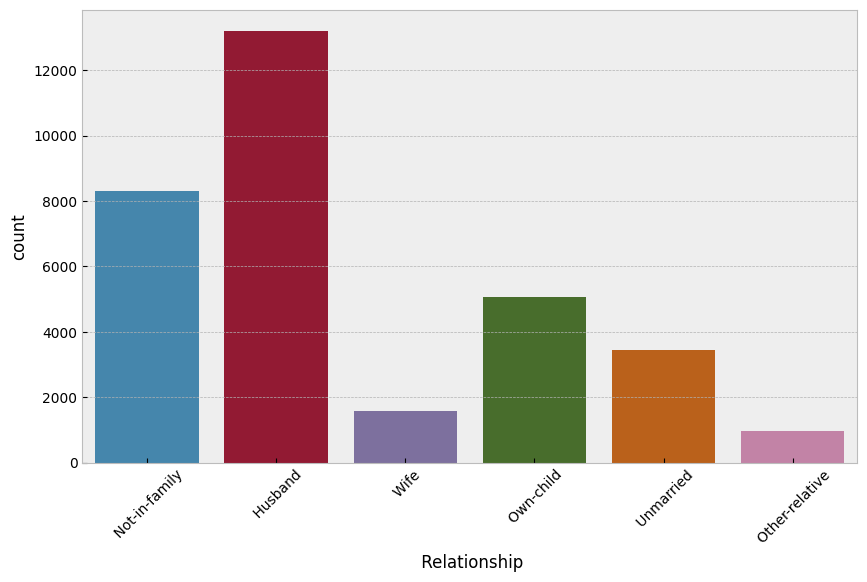

 Race


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


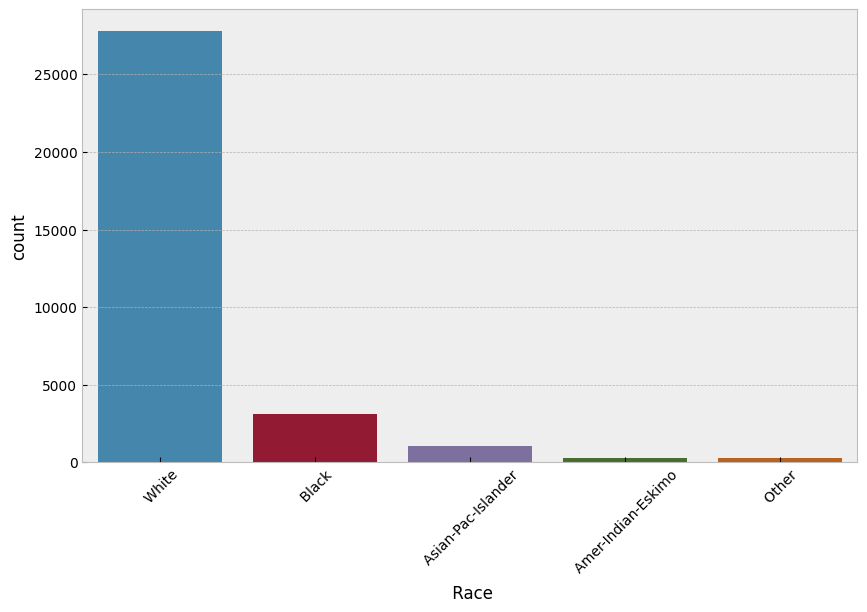

 Sex


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


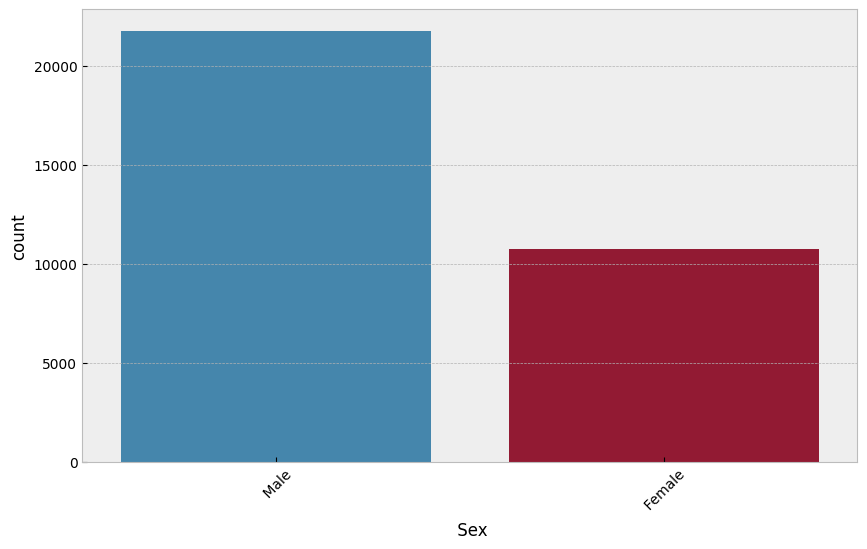

In [50]:
for i in df.iloc[:,:-2].select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    plt.show()

# 4 Correlations

## 4.1 Numerical with Income

/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:950: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:950: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:950: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:950: UserWarning: You passed a edgecolor/edgecolor

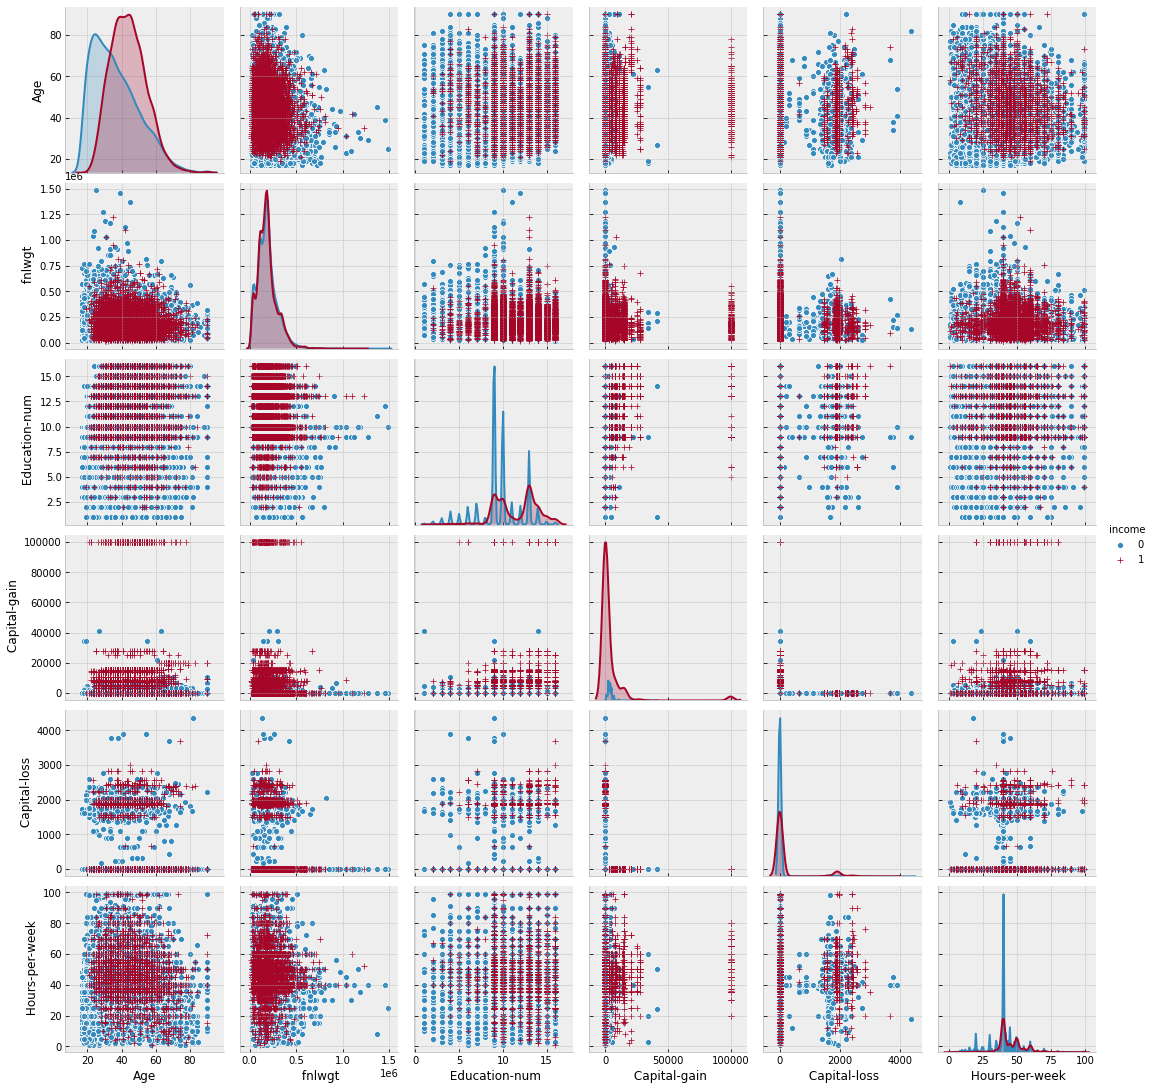

In [96]:
sns.pairplot(df.select_dtypes(include='int64'),hue="income", markers=["o", "+"])

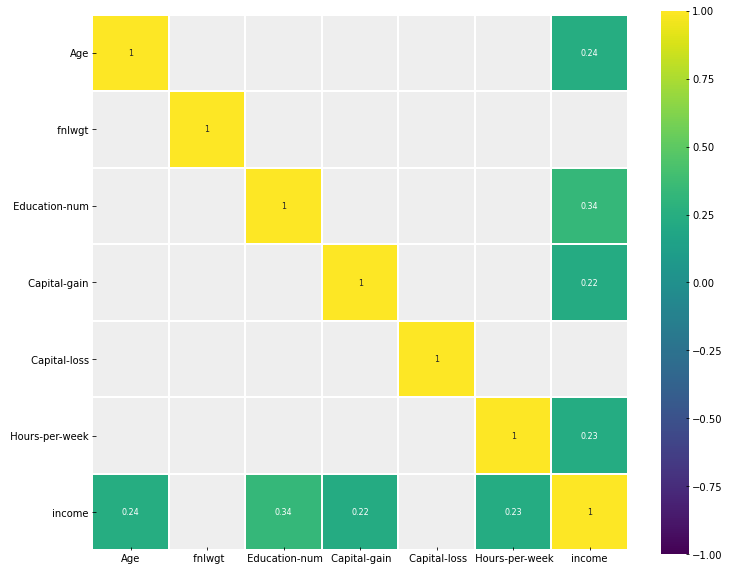

In [119]:
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## 4.2 Categorical with Income

## 4.2.1 average income 

In [83]:
df_ca = df.select_dtypes(include = ['object'])
df_ca=df_ca.merge(df['income'],left_index=True,right_index=True)
df_ca.drop(' Income',axis=1,inplace=True)
df_ca.head()

,Work-class,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0


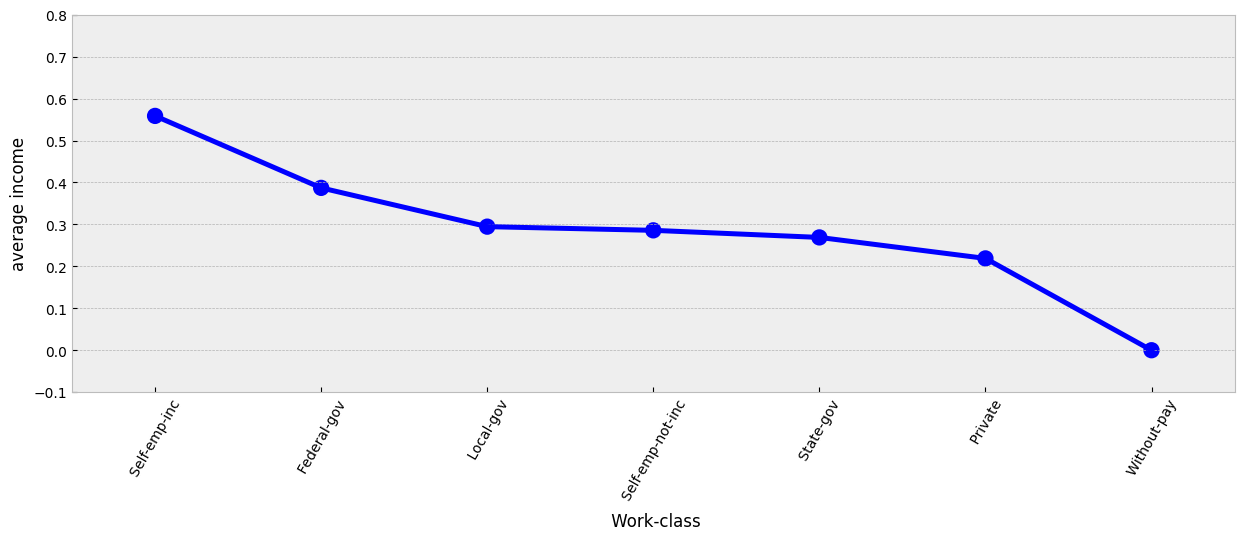

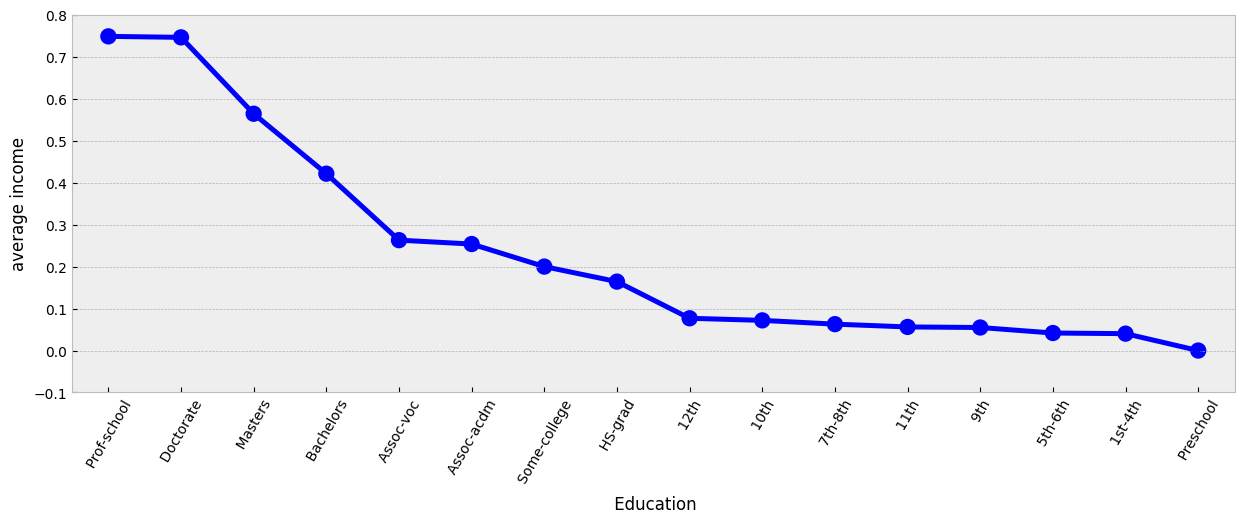

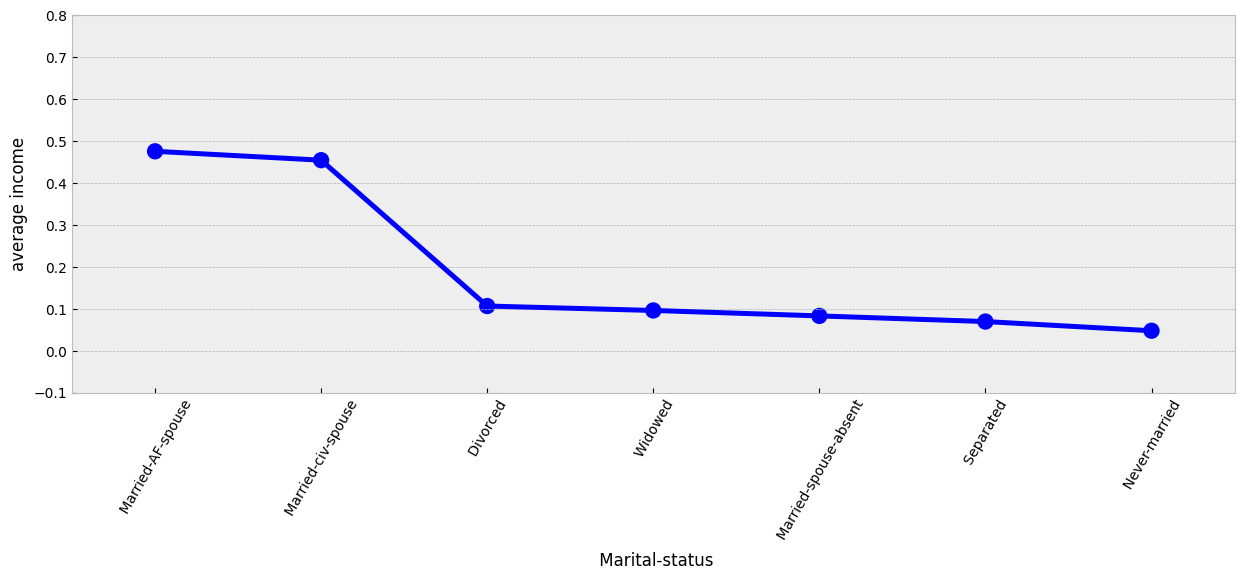

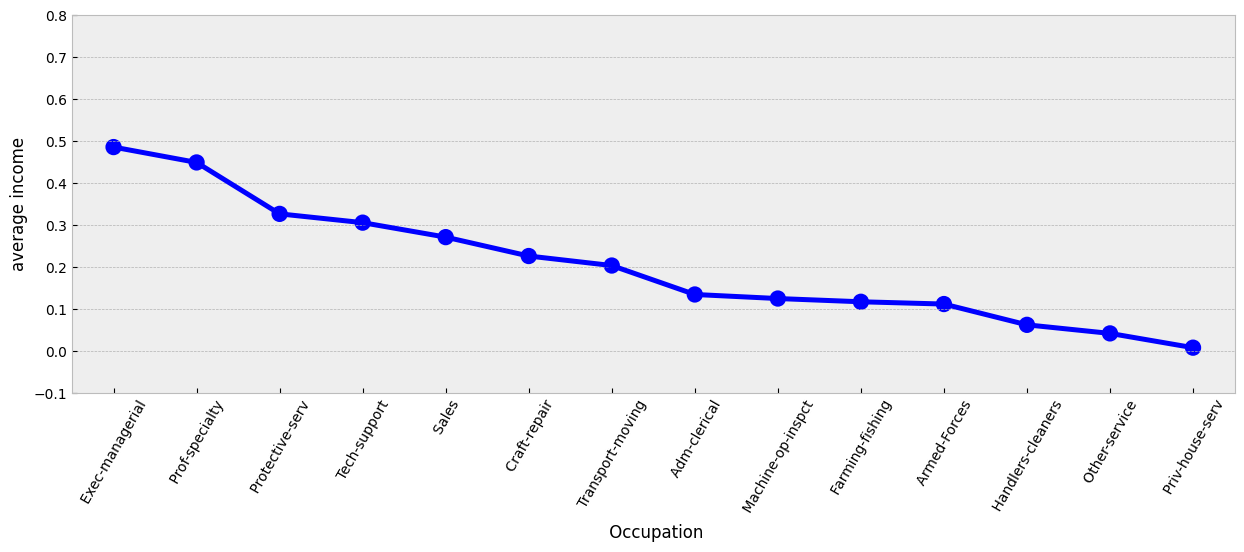

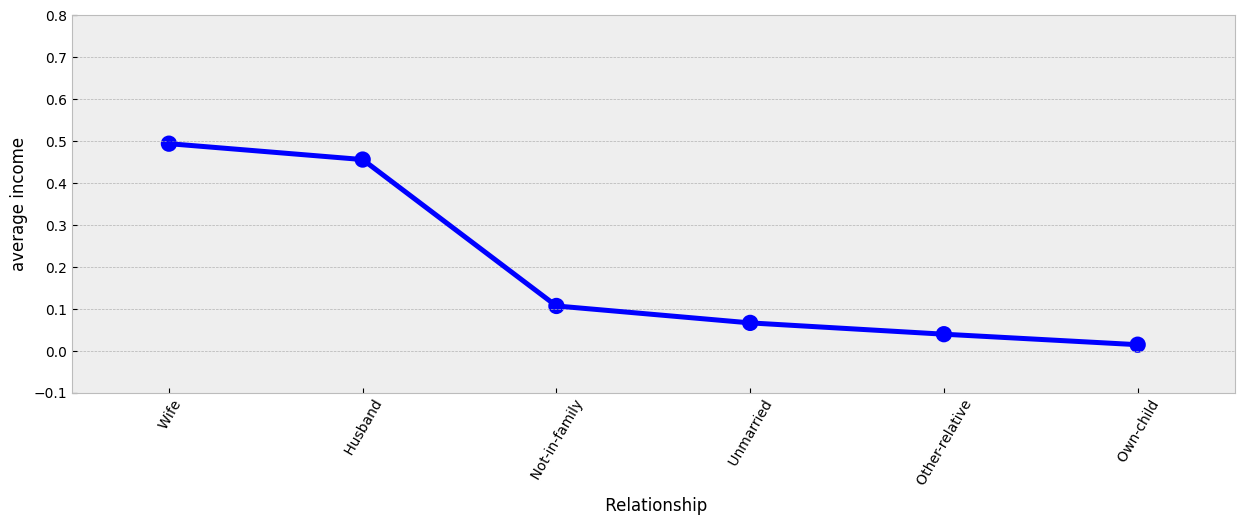

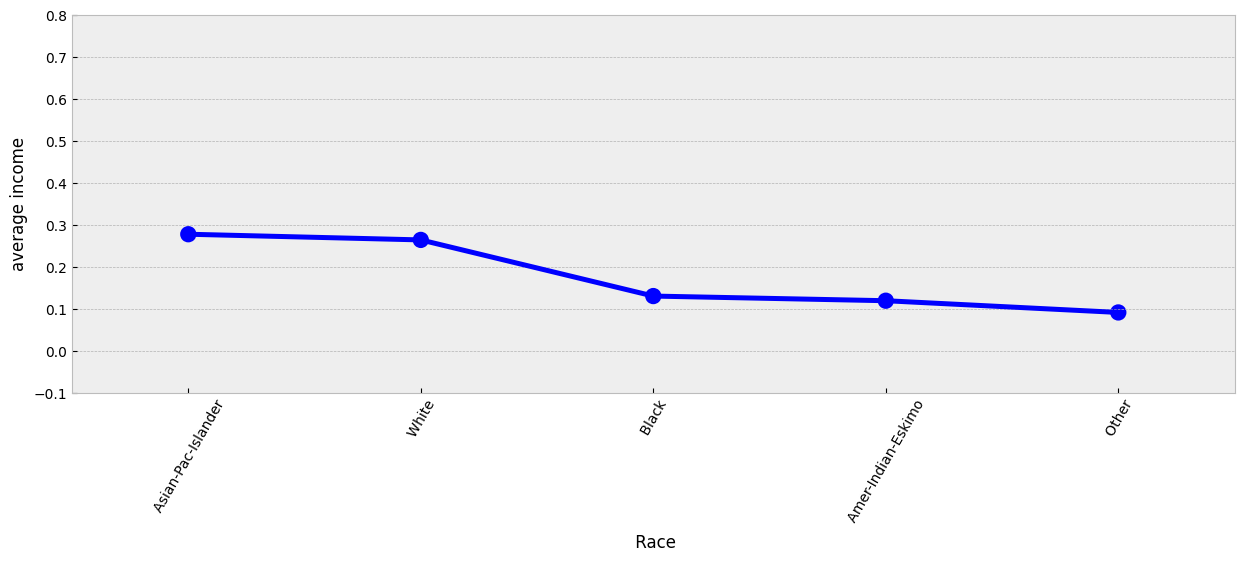

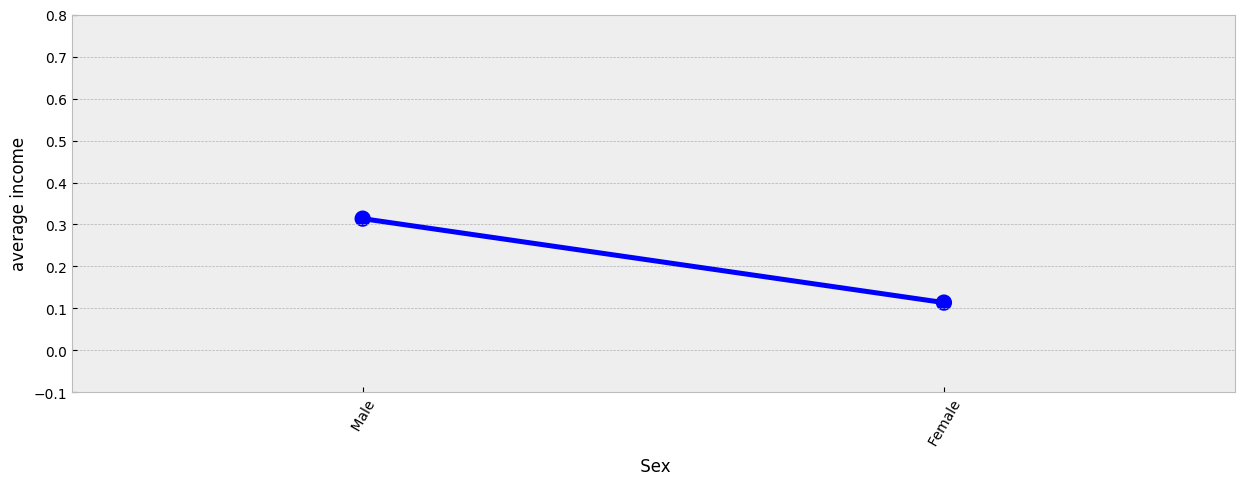

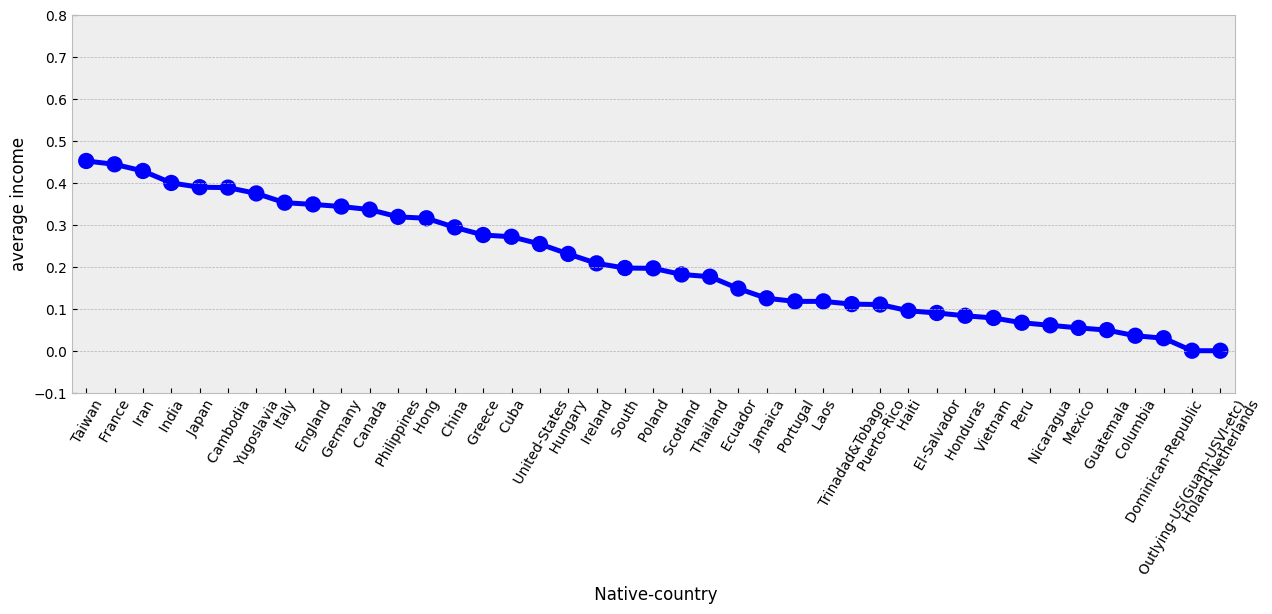

In [86]:
for i in df_ca.columns[:-1]:
    df_tem=df_ca[[i, 'income']].groupby([i], as_index=False).mean().sort_values(by='income', ascending=False)
    plt.figure(figsize=(15,5),dpi=100)
    x=df_tem.iloc[:,0]
    y=df_tem.iloc[:,1]
    ax=sns.pointplot(x=x,y=y,color='blue')
    ax.set_ylim(-0.1,0.8)
    plt.ylabel('average income')
    plt.xticks(rotation=60)
    plt.show()

### 4.2.2 count by income for every categorical columns

 Work-class


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


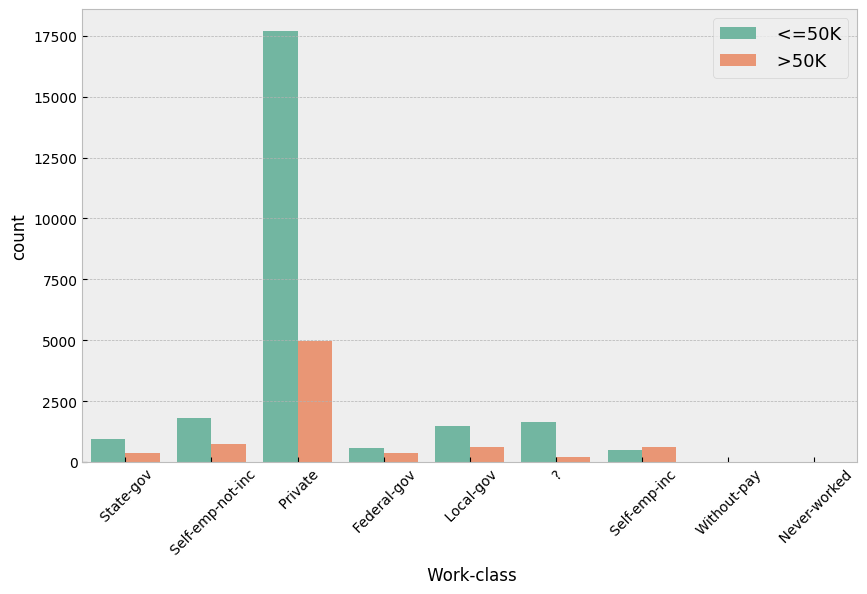

 Education


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


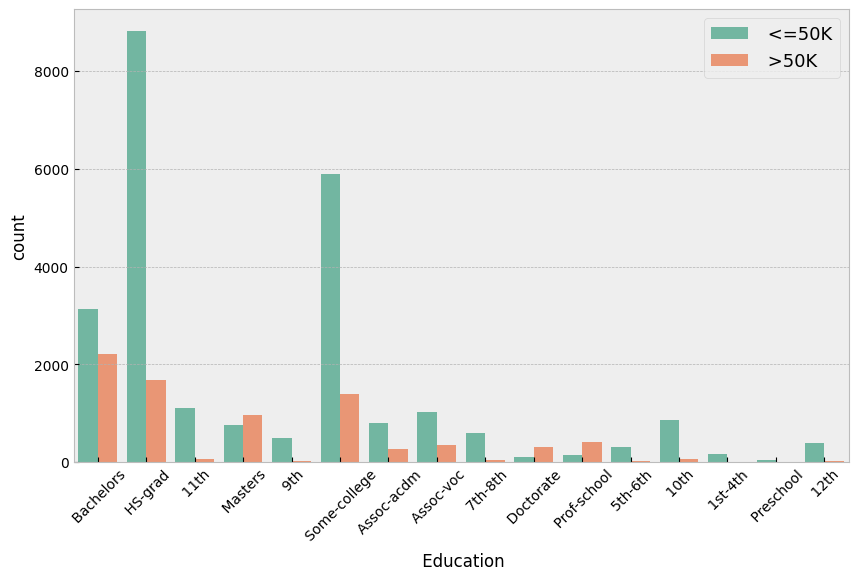

 Marital-status


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


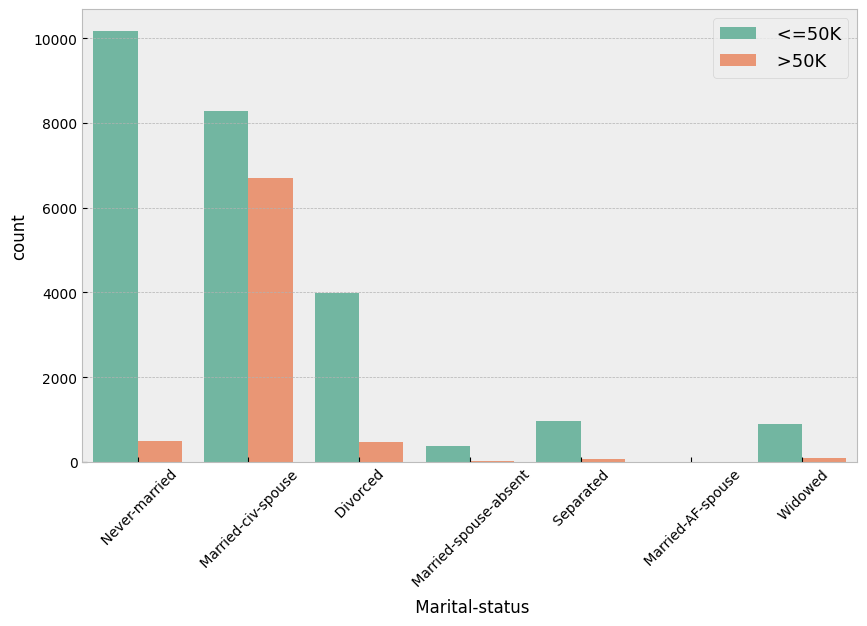

 Occupation


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


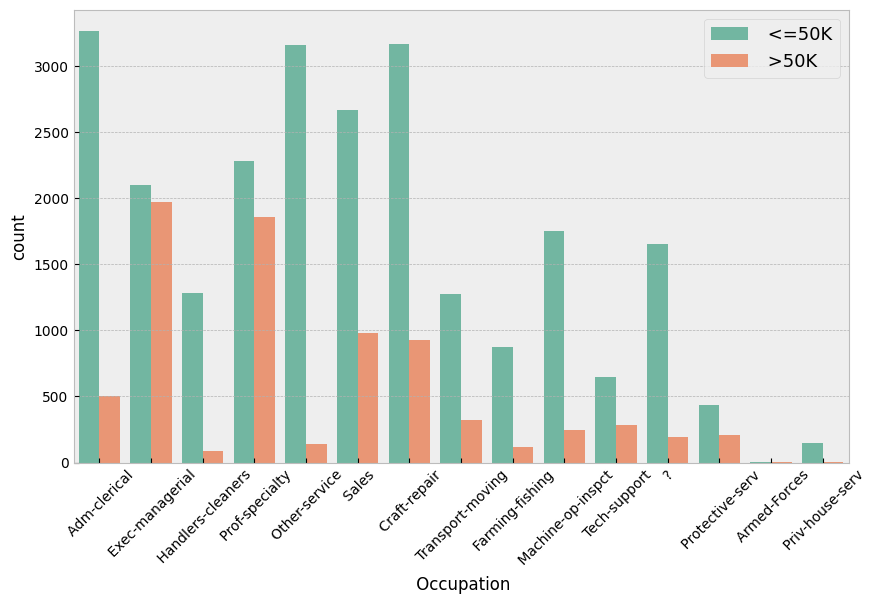

 Relationship


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


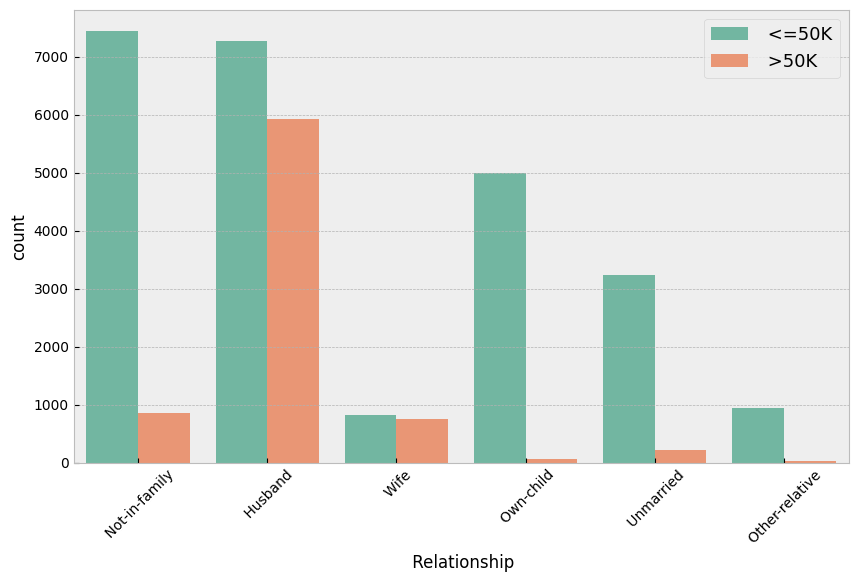

 Race


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


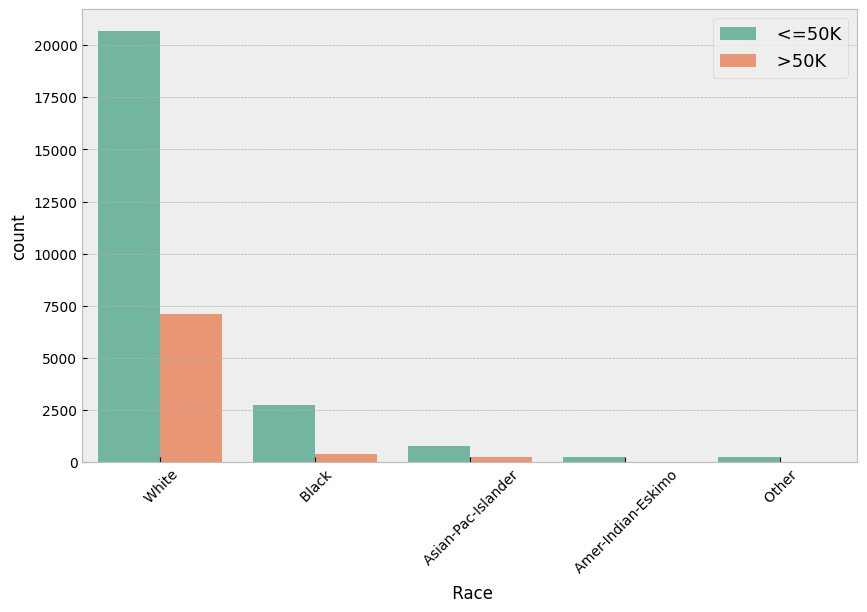

 Sex


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


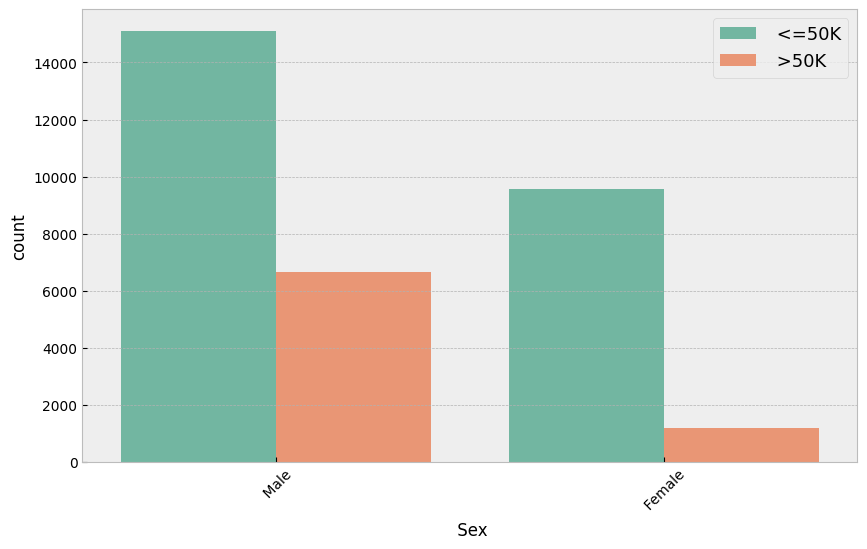

In [55]:
for i in df.iloc[:,:-2].select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    sns.countplot(df[i],hue=df[' Income'],palette="Set2")
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', fontsize=13)
    plt.show()

### 4.2.3 Count by income when they are female. interesting findings

 Work-class


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


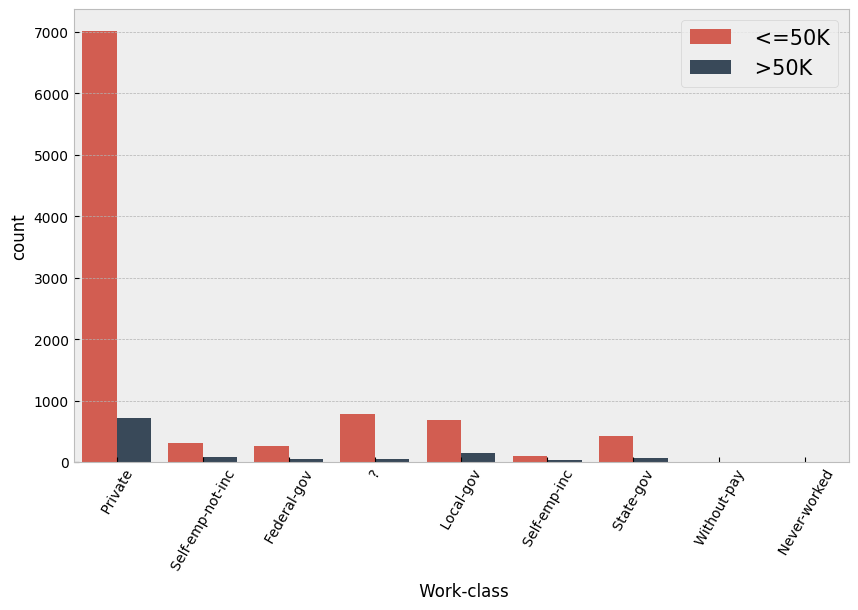

 Education


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


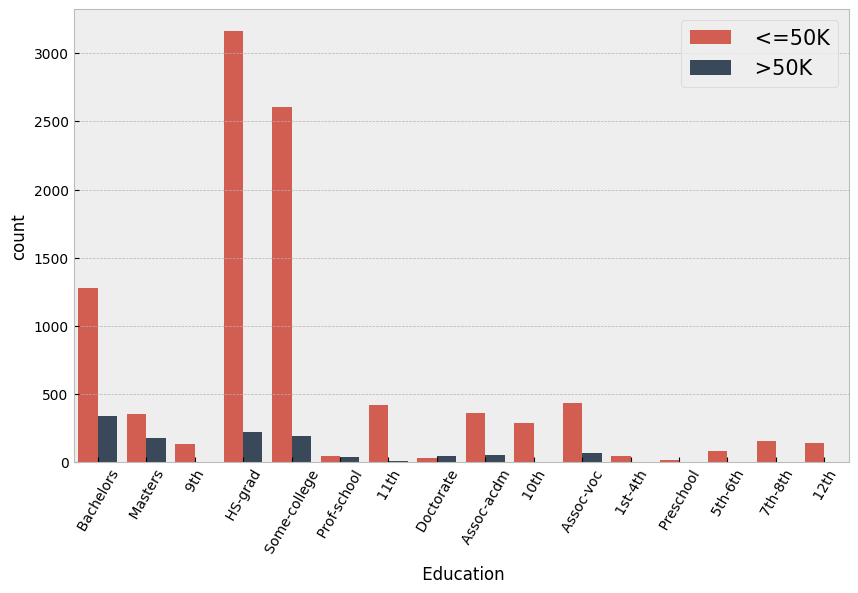

 Marital-status


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


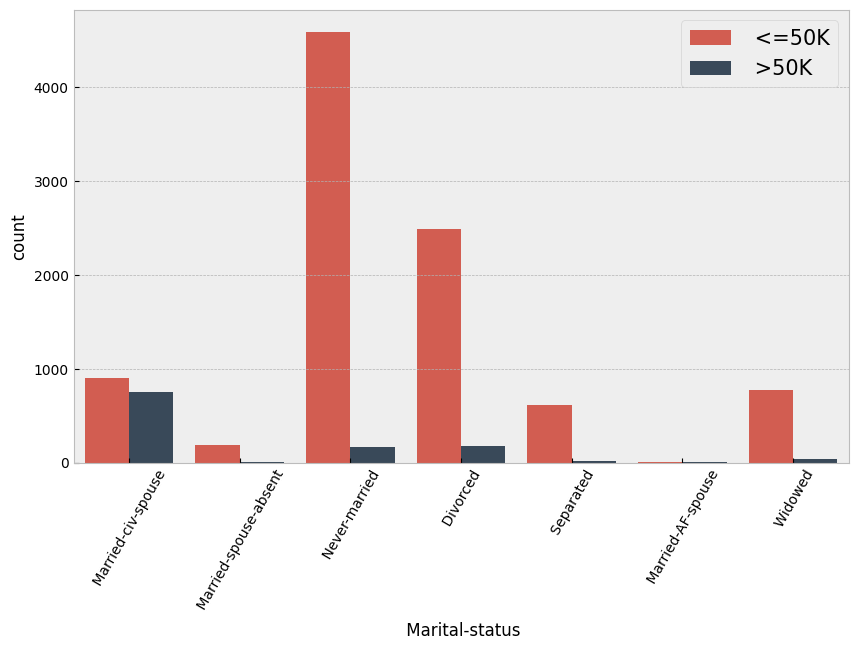

 Occupation


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


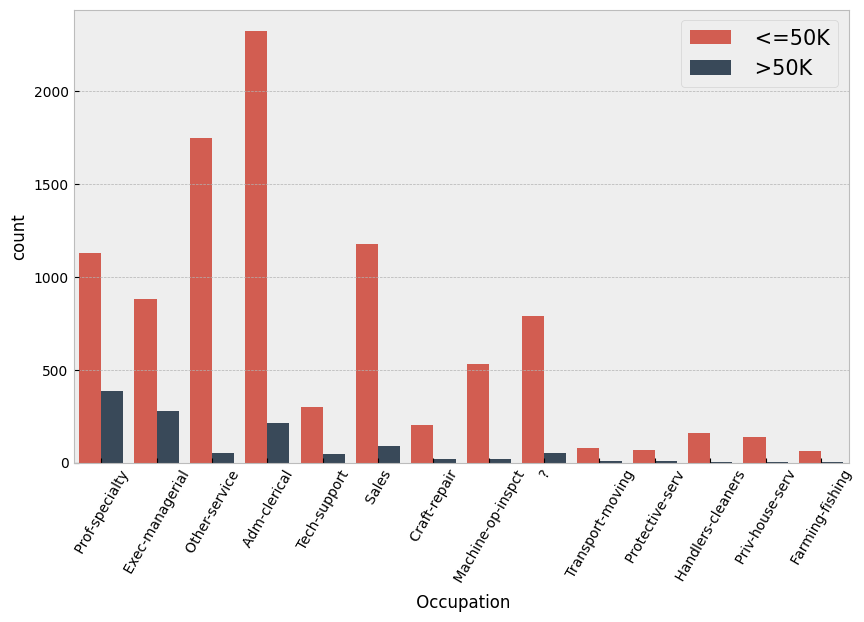

 Relationship


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


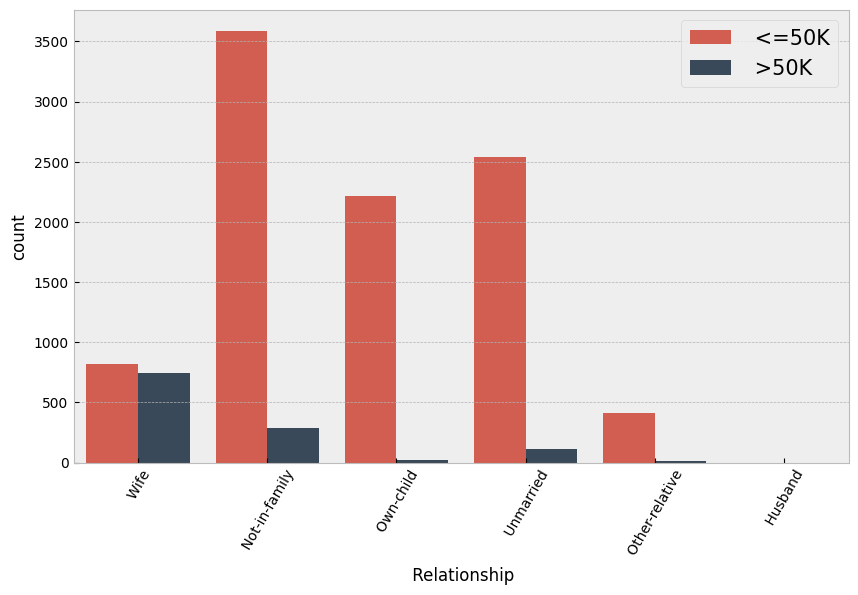

 Race


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


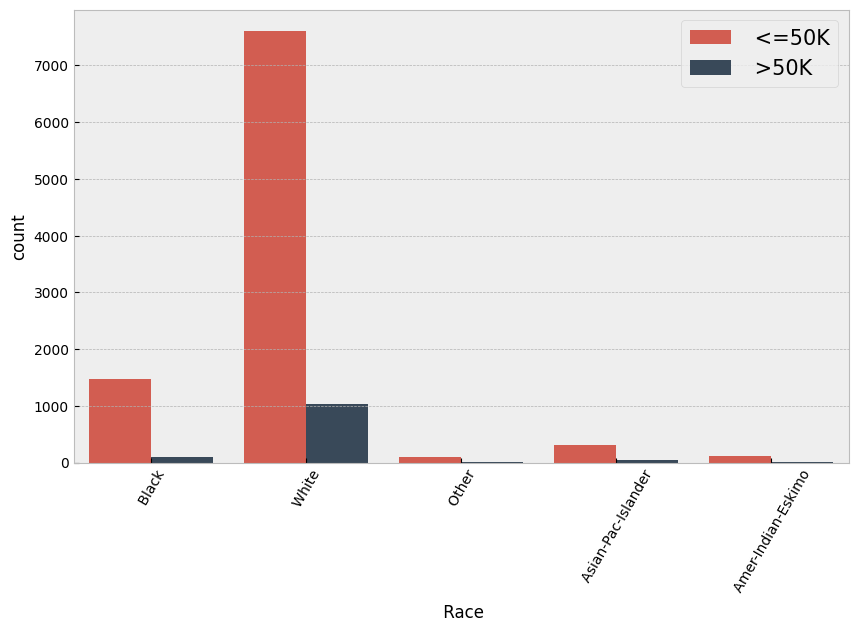

 Sex


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


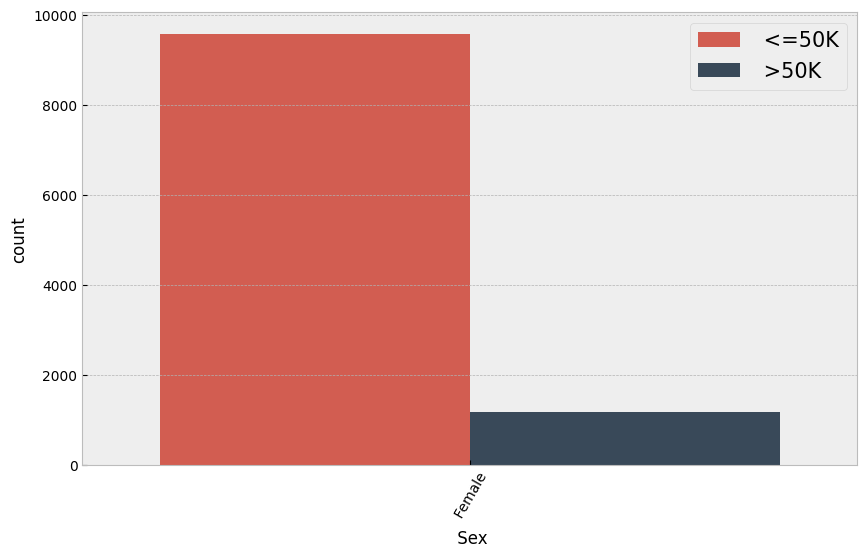

In [49]:
for i in df.iloc[:,:-2].select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.countplot(df[df[' Sex']==' Female'][i],hue=df[' Income'],palette=flatui[3:])
    plt.xticks(rotation=60)
    plt.legend(fontsize=15,loc='upper right')
    plt.show()

### 4.2.4 Count by income when they are male. interesting findings

 Work-class


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


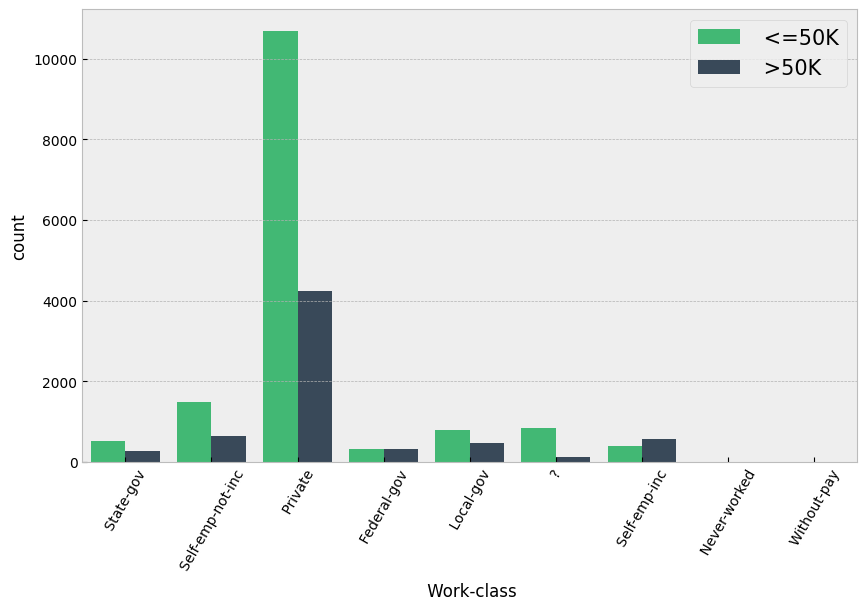

 Education


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


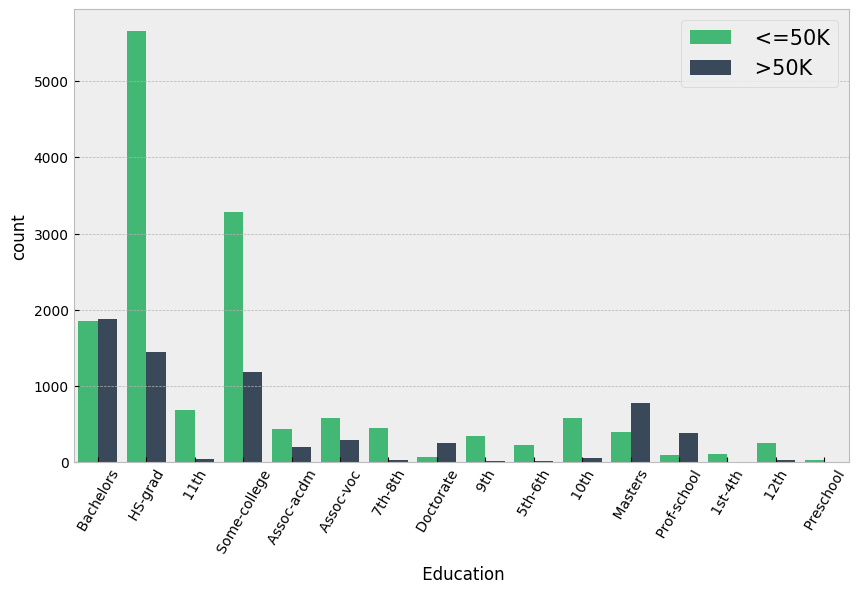

 Marital-status


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


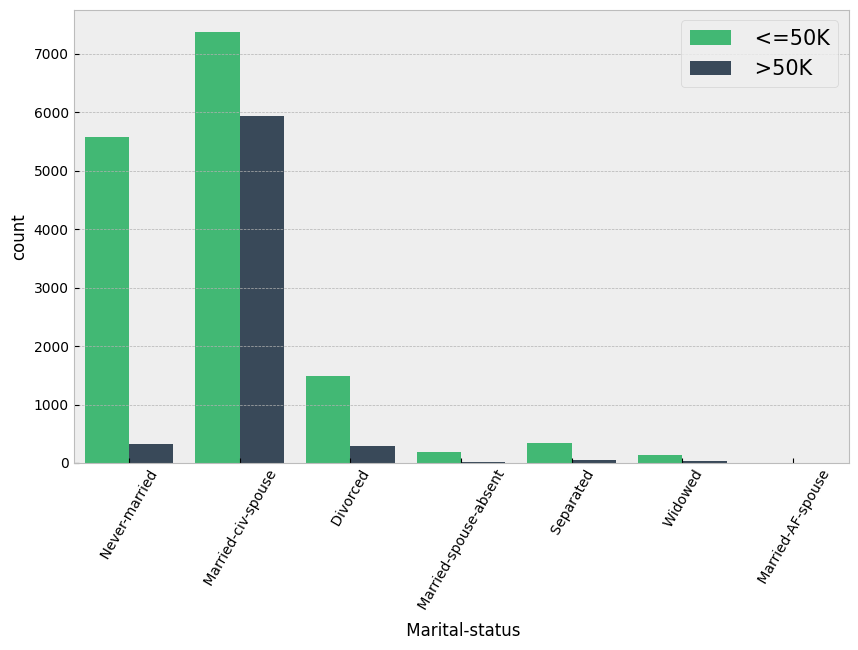

 Occupation


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


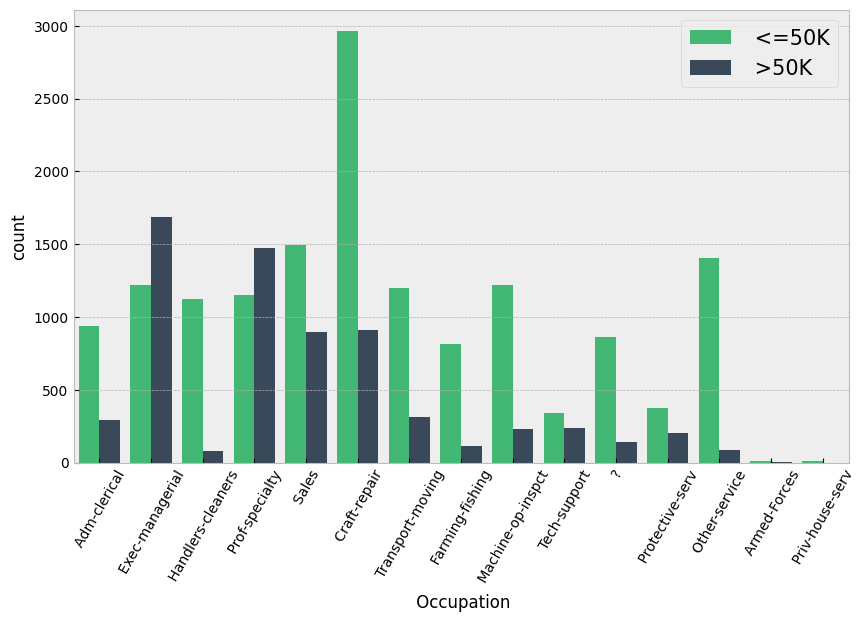

 Relationship


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


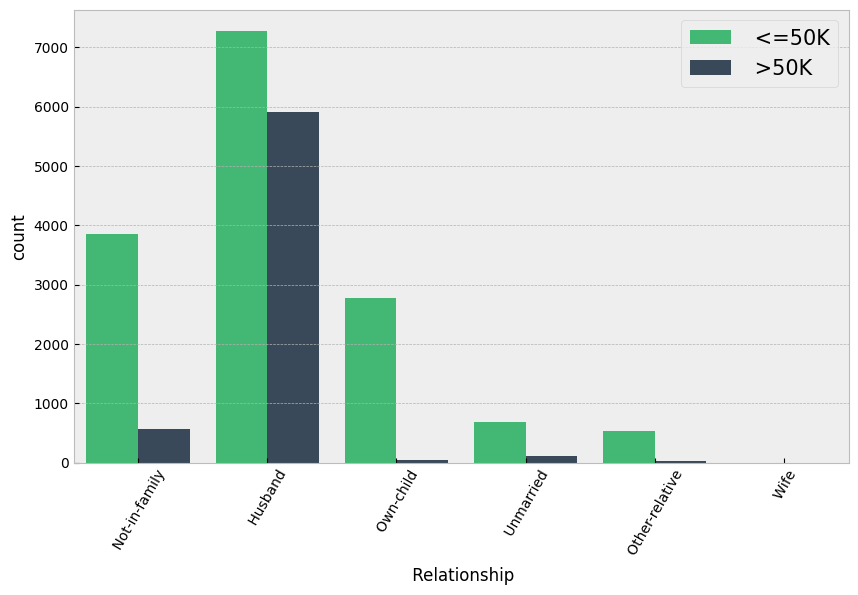

 Race


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


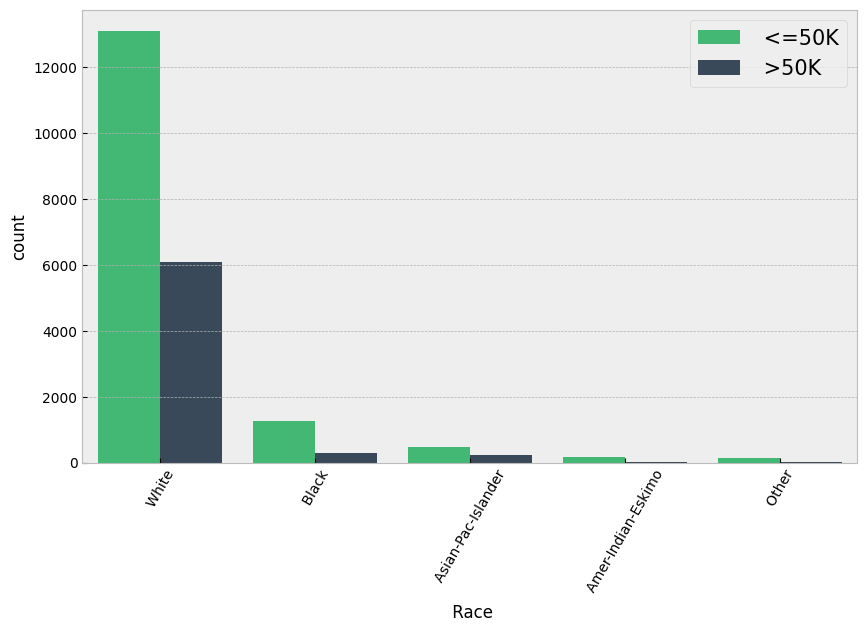

 Sex


/Users/kwanghun.lee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


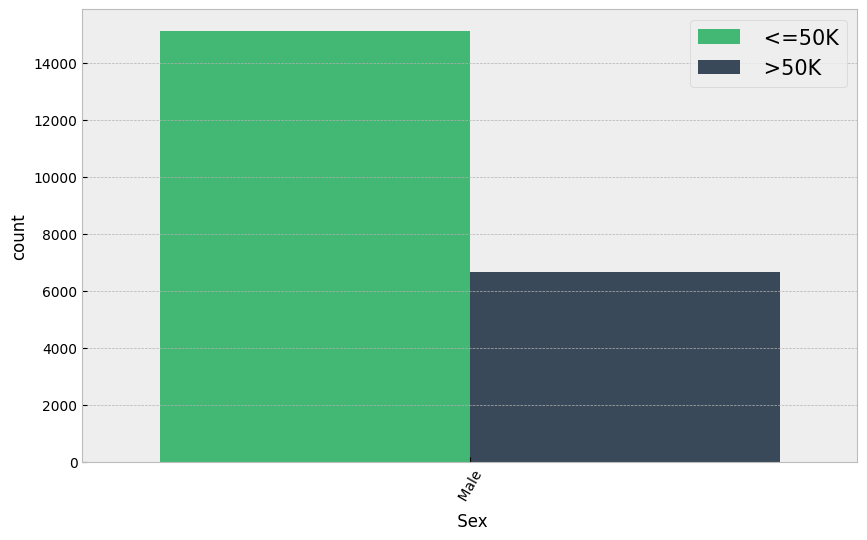

In [52]:
for i in df.iloc[:,:-2].select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    flatui = [  "#2ecc71","#34495e"]
    sns.countplot(df[df[' Sex']==' Male'][i],hue=df[' Income'],palette=flatui)
    plt.xticks(rotation=60)
    plt.legend(loc='upper right', fontsize=15)
    plt.show()